# Sampling Distributions for Proportions

## Bernoulli Random Variable
A **bernoulli** random variable is defined as having two outcomes ("success", or "failure"):
$$
f(y)=\left\{\begin{array}{ll}
1 & \text { success } \\
0 & \text { failure }
\end{array}\right.
$$

where $p$ is the probability of achieving a successful outcome. Therefore:
$$P(Y=1) = p$$
We let $q$ be the probability of a "failure" outcome:
$$P(Y=0) = q$$
Since there are only two outcomes: $$q = 1 - p$$

We can denote a bernoulli random variable as $Y$, where $Y$ has a single parameter, $p$.

In [128]:
import numpy as np
from scipy.stats import bernoulli

In [129]:
p = 0.25

In [130]:
Y = bernoulli(p=p)

We can perform a single trial of this bernoulli random variable and get an outcome (either 1, for success, or 0 for failure). 

In [136]:
np.random.seed(0)
outcome = Y.rvs() # take a sample
print(outcome)

0


If we take multiple trials, and sum the outcomes, the resulting random variable is said to be **binomially distributed**. 

## Binomial Random Variable
If we sample a bernoulli random variable $n$ times and take the sum, the resulting variable is itself a random variable, which we denote by $X$.  

$$X = \sum_{i=1}^{n}{Y_i}$$

The binomially distributed random variable $X$ has the parameters $n$ and $p$. 

For a single sample of the random variable $X$ (which we can denote with $X_i$, and which is itself $n$ sample of a bernoulli distributed random variable), we can calculate the ***sample proportion*** (denoted $\hat{p}$), which serves as an estimate of the ***population proportion*** $p$:<br><br>
$$\hat{p} = \frac{\sum_{i=1}^{n}{Y_i}}{n}=\frac{X_i}{n}$$

The mean of a binomially distributed random variable is:
$$E(X) = np$$

and the variance is:
$$Var(X) = npq$$

I'm not going to into proofs here, but you can google why this is :) 

## Notation Thus Far
Some notation to start us off with:<br>
- $p$ is the population proportion. It is a fixed value.<br>
- $n$ is the size of the random sample. <br>
- $\hat{p}$ is the _sample_ proportion. It varies based on the sample. <br>
- $X_i$ represents the $i$th sample containing the outcomes of $n$ bernoulli trials.

In [137]:
## create PMF for random bernoulli variable
# use our bernoulliy random variable and sample from it n times...
# ...creating a binomial random variable with parameters n and p
n = 100

# take a single sample of size n, call it X_0
X_0 = Y.rvs(size=n) 

# calculate a sample proportion called p_hat
p_hat = sum(X_0) / n
print('p_hat = {}'.format(p_hat))
q_hat = 1 - p_hat

p_hat = 0.2


In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

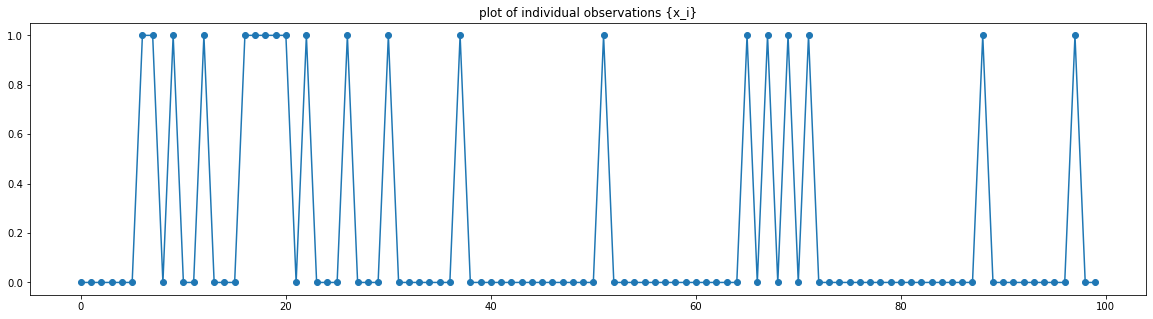

In [139]:
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
ax.plot(X_0, marker='o');
plt.title('plot of individual observations {x_i}');

Text(0.5, 1.0, 'PMF for Bernoulli RV with p = 0.25')

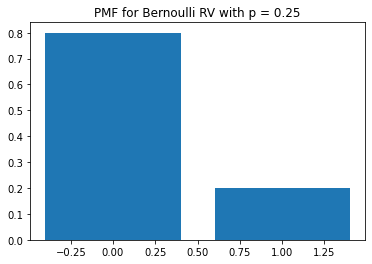

In [140]:
# create an empirical P.M.F. (probability mass function) for the bernoulli random variable 
# aka generate a PMF programmatically
plt.bar(x=[0,1], height=[q_hat, p_hat], )
plt.title('PMF for Bernoulli RV with p = {}'.format(p))

## PMF of a Binomially Distributed Random Variable

Construct the empirical PMF of a binomially distributed RV by taking repeated samples and plotting a histogram of the results. 

In [48]:
p = 0.25
n = 100
num_samples = 1000

Y = bernoulli(p) # setup RV with parameter p

# sample a bernoulli random variable num_samples times
X_i = []
for i in range(num_samples):
    sample = Y.rvs(size=n)
    X_i.append(sample)

In [49]:
print(np.array(X_i).shape)

(1000, 100)


Now we have 1000 samples, each with 100 observations, where each observation is either a {1} or {0}.

In [50]:
print(X_i[0])

[0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1]


A binomially distributed random variable represents the sum of $n$ outcomes of a bernoulli distributed random variable (see formulas above), so let's calculate the sum of each random sample. 

In [51]:
_X = []
for sample in X_i:
    _X.append(np.sum(sample))

Now let's plot a histogram of the sums. 

In [53]:
import seaborn as sns

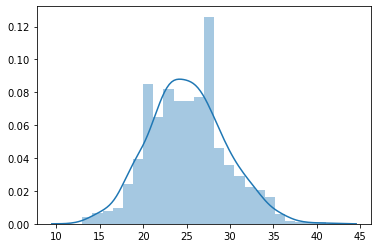

In [67]:
sns.distplot(_X);

We can see that the distribution is centered around the mean of the binomially distributed random variable $X$, which, since it has parameters $n = 100$ and $p = 0.25$, is $E(X) = np = 25$.

Accordingly, for each sample, we can also calculate sample proportion $\hat{p}$, by taking the sum of each sample's individual observations, and dividing by the total size of the sample, $n$. 

In [61]:
# for one sample
sample = _X[0]
p_hat = sample / n
print(p_hat)

0.27


The true value for the population proportion $p$ is 0.25, but our individual estimate based on a single sample yielded 0.27. 

We can calculate a sample proportion $\hat{p}$ for each sample, and plot the resulting distribution - this will the PMF of the binomial random variable X. 

In [62]:
_p_hat = []
for sample in _X:
    p_hat = sample / n
    _p_hat.append(p_hat)

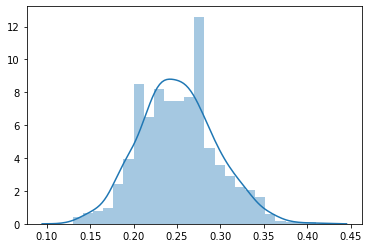

In [71]:
sns.distplot(_p_hat);

We can see that the distribution is centered around roughly 0.25, which makes sense since our population proportion is 0.25. 

This is what is called the **sampling distribution of sample proportions**.

We can see that each individual sample's sample proportion, can vary greatly from the mean of 0.25. This variation  quantifies the amount that each sample proportion tends to vary with respect to the mean of 0.25 (the population proportion).  We call this variation the **standard error**. 

We can see how the standard error, or the shape of the distribution, changes depending on how big our sample size $n$ is. For instance, if we make $n = 1000$, and take `num_samples` samples and plot the distribution, we get:

In [80]:
_p_hat_1000 = []
for i in range(num_samples):
    sample = Y.rvs(size=1000)
    p_hat = np.sum(sample) / 1000
    _p_hat_1000.append(p_hat)

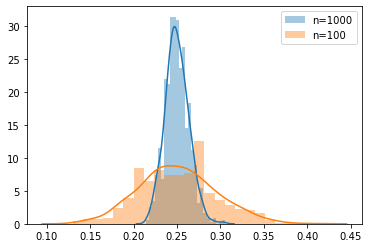

In [90]:
sns.distplot(_p_hat_1000, label='n=1000', );
sns.distplot(_p_hat, label='n=100');
plt.legend();

We can see that the standard error (the standard deviation of the sampling distribution) has changed. The distribution where `n = 1000` is much tighter than the distribution for `n = 100`.

What does this mean? It means that a sample with `n = 1000` has a higher chance of it's sample proportion hitting our target of 0.25 (the true population proportion) than a sample taken with only `n = 1000` samples. 

It means that samples taken when n is higher are typically more _accurate_ than samples where n is lower. This "accuracy" is quantified via a **confidence interval**.

## Confidence Intervals for Sample Proportions

We can calculate a confidence interval in which we should expect the true population proportion to lie within, most of the time (95% of the time, typically). 

This is kind of confusing, but not really, when you think about it. All we're saying is that typically, we only have one sample - one sample with $n$ observations in it. 

What we want to know is, how accurate is this sample? How representative of the population is it? 

Well, we can use the standard error to get a sense of the range of values around the sample proportion within which we should expect to find the true population proportion.

Let's calculate a confidence interval for one sample of our binomially distributed random variable where `n=100`. 

In [142]:
np.random.seed(0)

# take our sample
sample = Y.rvs(size=100)

# calculate the sample proportion, p_hat
p_hat = np.sum(sample) / 100

# calculate the 95% confidence interval
from statsmodels.stats.proportion import proportion_confint
ci = proportion_confint(np.sum(sample), nobs=100, alpha=1 - 0.95)

print('p_hat={}'.format(p_hat))
print('ci={}'.format(ci))

p_hat=0.2
ci=(0.12160144061839785, 0.2783985593816022)


For this sample, our sample proportion ended up being 0.2 - but our 95% confidence goes from 0.12 to 0.27.

If we were to do this same process 100 times, we can expect 95 of those confidence intervals generated to include the true population proportion of 0.25. _That's_ what a confidence interval truly means.

(but colloquially, it is used to give an estimate of the range of values we can expect to find the true population proportion within)

## Real World Example - Positivity Rate of World COVID-19 Data from John Hopkins University 

So what if we use a real world example to illustrate the usefulness of confidence intervals and the standard error? For this example, I'll be using data from John Hopkins University of the number of confirmed cases and the number of tests administered:

https://ourworldindata.org/grapher/covid-19-daily-tests-vs-daily-new-confirmed-cases-per-million?tab=chart&stackMode=absolute&time=latest&country=&region=World

The data is contained in the following github repo, publically available: https://github.com/owid/covid-19-data/tree/master/public/data/

In [143]:
import pandas as pd

In [149]:
# append ?raw=True at the end of the URL 
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=True'
df = pd.read_csv(url, index_col=0)

In [150]:
df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [151]:
df.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
     

In [163]:
# get today's date
from datetime import datetime, timedelta

In [170]:
yesterday_dt = datetime.now() - timedelta(days=1)
yesterday = yesterday_dt.strftime('%Y-%m-%d')
print('yesterday={}'.format(yesterday))

yesterday=2021-02-09


In [173]:
dft = df[df['date']==yesterday]

In [180]:
# dft.plot(x='new_cases_smoothed_per_million', y='new_tests_smoothed_per_thousand', kind='scatter')

In [ ]:
x = 
y = 
plt.scatter()